#Data Visualization and Pre-processing

##Task

###1.Load the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
st=StandardScaler()
nm=MinMaxScaler()

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


###2.Perform Below Visualizations.

####*Univariate Analysis

In [ ]:
dc=df.head(6)

In [ ]:
x=dc['RowNumber']
y=dc['CreditScore']

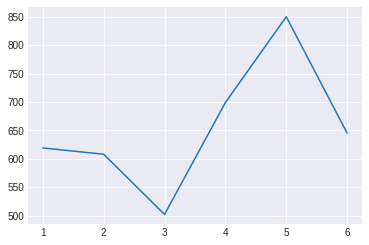

In [ ]:
plt.plot(x,y)

####*Bi-Variate Analysis

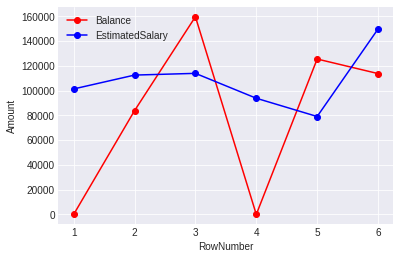

In [ ]:
x=dc['RowNumber']
y1=dc['Balance']
y2=dc['EstimatedSalary']
plt.plot(x,y1,'r',marker='o',label='Balance')
plt.plot(x,y2,'b',marker='o',label='EstimatedSalary')
plt.xlabel('RowNumber')
plt.ylabel('Amount')
plt.legend()

####*Multi-Variate Analysis

<BarContainer object of 10000 artists>

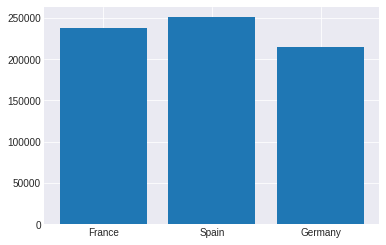

In [ ]:
plt.bar(df['Geography'],df['Balance'])

###3.Perform descriptive statistics on the dataset.


In [ ]:
dg=df.head(100)

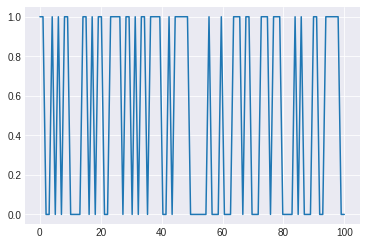

In [ ]:
x=np.linspace(0,100,100)
y=dg['IsActiveMember']
plt.plot(x,y)

###4.Handle the Missing values.


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###5.Find the outliers and replace the outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Surname'].unique

<bound method Series.unique of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>

In [ ]:
ds=df.drop('Surname',axis=1)

###6.Check for Categorical columns and perform encoding.


In [ ]:
count(ds['Geography'])

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [ ]:
ds['Geography']=le.fit_transform(ds['Geography'])

In [ ]:
ds

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
count(ds['Gender'])

Counter({'Female': 4543, 'Male': 5457})

In [ ]:
ds['Gender']=le.fit_transform(ds['Gender'])
ds

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


###7. Split the data into dependent and independent variables.

In [ ]:
x=ds.drop('Gender',axis=1)
y=ds['Gender']

In [ ]:
x

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

###8.Scale the independent variables

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

In [ ]:
xtest

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3104,3105,15654230,526,1,31,5,145537.21,1,1,0,132404.64,0
6353,6354,15676353,598,0,35,8,114212.60,1,1,1,74322.85,0
8689,8690,15684769,542,0,67,10,129431.36,1,0,1,21343.74,0
5857,5858,15813659,594,0,56,7,0.00,1,1,0,26215.85,1
6011,6012,15783007,520,1,45,1,123086.39,1,1,1,41042.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8125,8126,15666982,629,1,38,9,123948.85,1,1,0,76053.07,0
8444,8445,15793641,792,0,70,3,0.00,2,1,1,172240.27,0
2167,2168,15780846,787,0,33,1,126588.81,2,0,1,62163.53,0
8043,8044,15616525,720,2,31,4,141356.47,1,0,0,137985.69,0


In [ ]:
xtrain

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1264,1265,15732199,837,2,31,9,104678.62,1,0,1,50972.60,0
5376,5377,15602500,850,2,38,1,146343.98,1,0,1,103902.11,0
2037,2038,15678146,668,2,24,7,173962.32,1,0,0,106457.11,1
6485,6486,15635197,640,1,26,5,90402.77,1,1,1,3298.65,0
1600,1601,15748718,517,0,28,2,115062.61,1,1,0,179056.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1294,15687752,641,0,30,2,87505.47,2,0,1,7278.57,0
4023,4024,15629187,535,0,38,8,85982.07,1,1,0,9238.35,0
7259,7260,15718921,625,2,32,7,106957.28,1,1,1,134794.02,0
5200,5201,15641298,512,1,42,9,93955.83,2,1,0,14828.54,0


###9.Split the data into training and testing

In [ ]:
s_xtrain=st.fit_transform(xtrain)
s_xtrain

array([[-1.29671985,  0.57944472,  1.9119867 , ...,  0.9673886 ,
        -0.85372045, -0.50267716],
       [ 0.12810842, -1.2259028 ,  2.04571272, ...,  0.9673886 ,
         0.07141614, -0.50267716],
       [-1.02887154, -0.17294697,  0.17354845, ..., -1.03371075,
         0.1160741 ,  1.98934841],
       ...,
       [ 0.7805772 ,  0.39462137, -0.26877607, ...,  0.9673886 ,
         0.61136515, -0.50267716],
       [ 0.06712355, -0.68585335, -1.43116378, ..., -1.03371075,
        -1.48546997, -0.50267716],
       [-0.42664597,  0.25658151, -1.26657791, ...,  0.9673886 ,
        -1.72784594, -0.50267716]])

In [ ]:
s_xtest=st.transform(xtest)
s_xtest

array([[-0.65915078, -0.50584615, -1.28715114, ..., -1.03371075,
         0.569602  , -0.50267716],
       [ 0.46664373, -0.19790466, -0.54651473, ...,  0.9673886 ,
        -0.44558951, -0.50267716],
       [ 1.27607924, -0.080758  , -1.12256527, ...,  0.9673886 ,
        -1.37159305, -0.50267716],
       ...,
       [-0.9838259 ,  1.2565875 ,  1.39765586, ...,  0.9673886 ,
        -0.65811806, -0.50267716],
       [ 1.05223706, -1.03068157,  0.70845253, ..., -1.03371075,
         0.66715124, -0.50267716],
       [-0.03093735, -0.11942642, -1.12256527, ..., -1.03371075,
         0.4454686 , -0.50267716]])